In [2]:
# =========================================================
# 0. Kütüphane Yükleme ve Etik Başlangıç
# =========================================================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Eğer Colab kullanıyorsanız bu satırı ekleyin:
# from google.colab import files
from IPython.display import display

# --- Etik Not: Analiz başlamadan önce, projenin etik kapsamını,
# --- veri gizliliği kurallarını ve paydaş beklentilerini (ASA A, C, D)
# --- onaylayın.
print("✅ Etik Kapsam ve Yetkinlik Onaylandı.")

✅ Etik Kapsam ve Yetkinlik Onaylandı.


In [3]:
# =========================================================
# 1. Veri Yükleme ve İlk Bakış Modülü (COLAB Versiyonu)
# =========================================================

import pandas as pd
from google.colab import files
from IPython.display import display

def load_data_colab_manual():
    """
    Colab ortamında kullanıcıdan manuel olarak dosya yüklemesini ister
    ve yüklenen CSV dosyasını DataFrame olarak döndürür.
    """
    print("📂 Lütfen CSV dosyanızı yükleyin. Yükleme tamamlandığında 'Seçilen dosyalar: ...' mesajı görünecektir.")

    # 1. Yükleme işlemi
    try:
        uploaded = files.upload()
    except Exception as e:
        print(f"❌ HATA: Dosya yükleme arayüzü başlatılamadı: {e}")
        return None

    if not uploaded:
        print("⚠️ Hata: Hiçbir dosya yüklenmedi.")
        return None

    # 2. Yüklenen dosyayı okuma
    file_name = list(uploaded.keys())[0]

    try:
        df = pd.read_csv(file_name)
        print(f"\n✅ '{file_name}' başarıyla yüklendi! Bu dosya ile analiz devam ediyor.")
        print(f"📊 Veri boyutu: {df.shape[0]} satır, {df.shape[1]} sütun")

        # Etik Kontrol: Veri Kaynağı Şeffaflığı
        print("⚠️ Etik Not: Lütfen bu veri setinin kaynağını ve veri kısıtlamalarını belgelediğinizden emin olun (ASA B.1).")

        return df

    except Exception as e:
        print(f"❌ HATA: '{file_name}' dosyası okunurken bir sorun oluştu. CSV formatında olduğundan emin olun. Hata: {e}")
        return None

# --- Örnek Çalıştırma ---
wdicountry_df = load_data_colab_manual()

# Yükleme başarılıysa, DataFrame'in ilk birkaç satırını kontrol edelim.
if wdicountry_df is not None:
    print("\n🔹 Yüklenen Veri Seti İlk 5 Satır:")
    display(wdicountry_df.head())

📂 Lütfen CSV dosyanızı yükleyin. Yükleme tamamlandığında 'Seçilen dosyalar: ...' mesajı görünecektir.


Saving WDIcountry-series.csv to WDIcountry-series.csv

✅ 'WDIcountry-series.csv' başarıyla yüklendi! Bu dosya ile analiz devam ediyor.
📊 Veri boyutu: 8086 satır, 3 sütun
⚠️ Etik Not: Lütfen bu veri setinin kaynağını ve veri kısıtlamalarını belgelediğinizden emin olun (ASA B.1).

🔹 Yüklenen Veri Seti İlk 5 Satır:


CountryCode         SeriesCode  \
0         ABW        ST.INT.ARVL   
1         ABW  EG.EGY.PRIM.PP.KD   
2         ABW     ST.INT.TRNR.CD   
3         ABW     ST.INT.RCPT.CD   
4         ABW     SP.DYN.AMRT.MA   

                                         DESCRIPTION  
0  Includes overnight visitors (tourists) and sam...  
1  Sources: Estimated based on UN Energy Statisti...  
2  Compiled from data reported in the Internation...  
3  Compiled from data reported in the Internation...  
4  Data source: United Nations World Population P...

In [5]:
# =========================================================
# 2. Genel Özet Modülü (DÜZELTİLMİŞ Hata Önleyici Versiyon)
# =========================================================

def display_summary(df):
    """Veri setinin genel özetini (head, info, describe) gösterir."""
    if df is None: return

    print("\n--- 📊 Veri Özeti ---")
    print("🔹 İlk 5 Satır:")
    display(df.head())

    print("\n🔹 Veri Türleri ve Eksik Değer Sayıları (Genel):")
    df.info()

    # --- HATA ÖNLEYİCİ KONTROL BAŞLANGICI ---
    # Sayısal sütunları seçer
    numerical_df = df.select_dtypes(include=['number'])

    if not numerical_df.empty:
        # Sayısal sütun varsa özet istatistikleri göster
        print("\n🔹 Sayısal Değişkenler İçin Özet İstatistikler:")
        display(numerical_df.describe().T)
        print("💡 Etik Not: describe() çıktısındaki uç değerleri (max/min) kontrol ederek, veri giriş hatalarını veya aykırı değerlerin neden olabileceği potansiyel çarpıklıkları değerlendirin (ASA B.2).")
    else:
        # Sayısal sütun yoksa uygun bir mesaj göster
        print("\n⚠️ Uyarı: Veri setinde hiç sayısal (integer, float) sütun bulunmamaktadır. Sayısal özet atlanmıştır.")
        print("💡 Etik Not: Bu veri seti sadece meta veri (tanımlayıcı bilgi) içeriyor gibi görünüyor. Daha sonraki analiz adımlarında sadece kategorik analiz (sıklık, oranlar) yapmanız gerekecektir.")
    # --- HATA ÖNLEYİCİ KONTROL SONU ---


# --- Örnek Çalıştırma ---
# wdicountry_df'nin yüklendiğini varsayıyoruz.
if 'wdicountry_df' in locals() and wdicountry_df is not None:
    display_summary(wdicountry_df)


--- 📊 Veri Özeti ---
🔹 İlk 5 Satır:


CountryCode         SeriesCode  \
0         ABW        ST.INT.ARVL   
1         ABW  EG.EGY.PRIM.PP.KD   
2         ABW     ST.INT.TRNR.CD   
3         ABW     ST.INT.RCPT.CD   
4         ABW     SP.DYN.AMRT.MA   

                                         DESCRIPTION  
0  Includes overnight visitors (tourists) and sam...  
1  Sources: Estimated based on UN Energy Statisti...  
2  Compiled from data reported in the Internation...  
3  Compiled from data reported in the Internation...  
4  Data source: United Nations World Population P...


🔹 Veri Türleri ve Eksik Değer Sayıları (Genel):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8086 entries, 0 to 8085
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CountryCode  8086 non-null   object
 1   SeriesCode   8086 non-null   object
 2   DESCRIPTION  8086 non-null   object
dtypes: object(3)
memory usage: 189.6+ KB

⚠️ Uyarı: Veri setinde hiç sayısal (integer, float) sütun bulunmamaktadır. Sayısal özet atlanmıştır.
💡 Etik Not: Bu veri seti sadece meta veri (tanımlayıcı bilgi) içeriyor gibi görünüyor. Daha sonraki analiz adımlarında sadece kategorik analiz (sıklık, oranlar) yapmanız gerekecektir.


In [6]:
# =========================================================
# 3. Eksik Veri Analizi Modülü
# =========================================================

def plot_missing_data(df):
    """Eksik değerlerin sayısını bar grafiği ile görselleştirir."""
    if df is None: return

    missing_data = df.isnull().sum()
    missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

    if missing_data.empty:
        print("✅ Veri setinde eksik değer bulunmamaktadır. Grafik atlandı.")
        return

    plt.figure(figsize=(12, max(6, len(missing_data) * 0.5)))
    sns.barplot(x=missing_data.index, y=missing_data.values, palette="viridis")
    plt.title('Eksik Değerlerin Sayısı', fontsize=16)
    plt.xlabel('Sütun Adı')
    plt.ylabel('Eksik Değer Sayısı')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Etik Kontrol: Eksik Veri İşleme
    print("🚨 Etik Not: Yüksek oranda eksik veriye sahip sütunlar için uygulayacağınız (silme, doldurma) yöntemini ve bunun sonuçları nasıl etkileyeceğini raporunuzda belirtmeyi unutmayın (ASA B.1, B.2).")

# --- Örnek Çalıştırma ---
if 'wdicountry_df' in locals() and wdicountry_df is not None:
    print("\n--- 3. Adım: Eksik Değer Kontrolü ---")
    plot_missing_data(wdicountry_df)


--- 3. Adım: Eksik Değer Kontrolü ---
✅ Veri setinde eksik değer bulunmamaktadır. Grafik atlandı.



--- 4. Adım: Kategorik Dağılım Analizi ---

[1/2] CountryCode Sıklık Analizi:


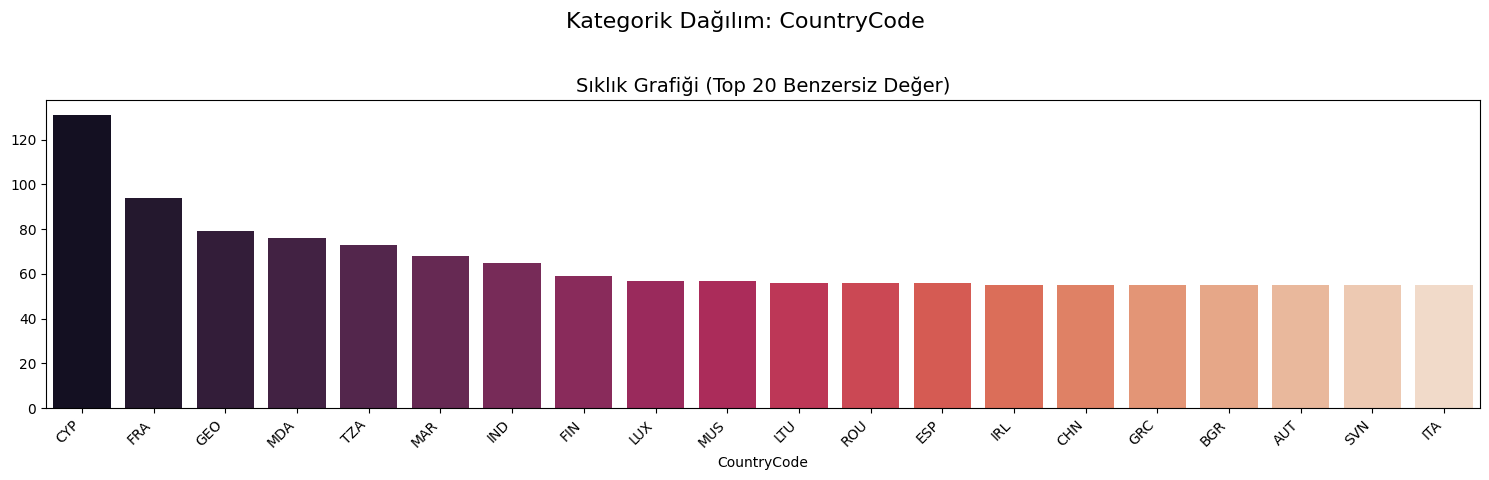

💡 Etik Not: 'CountryCode' değişkenindeki dağılımı inceleyerek, farklı insan grupları veya coğrafi bölgeler arasındaki olası eşitsizlikleri veya varyasyonları (ASA B.7) göz önünde bulundurun.

[2/2] SeriesCode Sıklık Analizi:


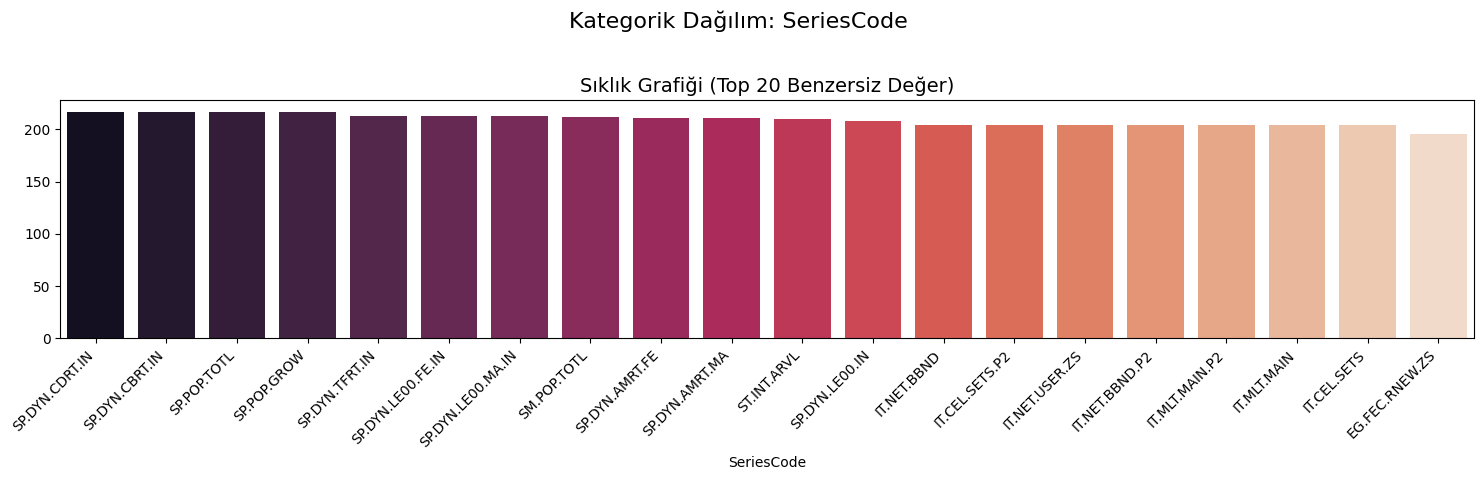

💡 Etik Not: 'SeriesCode' değişkenindeki dağılımı inceleyerek, farklı insan grupları veya coğrafi bölgeler arasındaki olası eşitsizlikleri veya varyasyonları (ASA B.7) göz önünde bulundurun.


In [9]:
# =========================================================
# 4. Tek Değişkenli Dağılım Modülü (Kategorik Odaklı)
# =========================================================

def plot_univariate_distribution(df, column, is_numerical=False):
    """
    Tek bir sütunun dağılımını görselleştirir (Bu veri setinde sadece Kategorik).
    """
    if df is None: return
    if column not in df.columns:
        print(f"❌ HATA: '{column}' sütunu veri setinde bulunamadı. Lütfen sütun adını kontrol edin.")
        return

    if is_numerical:
        # Sayısal: Atlıyoruz çünkü bu veri setinde yok
        print(f"⚠️ Uyarı: '{column}' sütunu sayısal değildir. Kategorik analiz (sıklık) yapılıyor.")

    plt.figure(figsize=(15, 5))

    # Kategorik: Bar Grafiği (Sıklık)
    plt.suptitle(f"Kategorik Dağılım: {column}", fontsize=16)

    # En çok tekrar eden 20 değeri al
    value_counts = df[column].value_counts().nlargest(20)

    if len(value_counts) < len(df[column].unique()):
        plot_title = f'Sıklık Grafiği (Top {len(value_counts)} Benzersiz Değer)'
    else:
        plot_title = 'Sıklık Grafiği'

    # FutureWarning'ı önlemek için 'hue' parametresini kullanıyoruz.
    sns.barplot(x=value_counts.index, y=value_counts.values, palette="rocket", hue=value_counts.index, legend=False)
    plt.title(plot_title, fontsize=14)
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    # Etik Kontrol: Varyasyonun Etkisi
    print(f"💡 Etik Not: '{column}' değişkenindeki dağılımı inceleyerek, farklı insan grupları veya coğrafi bölgeler arasındaki olası eşitsizlikleri veya varyasyonları (ASA B.7) göz önünde bulundurun.")


# --- Örnek Çalıştırma ---
if 'wdicountry_df' in locals() and wdicountry_df is not None:

    print("\n--- 4. Adım: Kategorik Dağılım Analizi ---")

    # Veri setindeki gerçek sütun adlarını kullanarak çalıştırın
    print("\n[1/2] CountryCode Sıklık Analizi:")
    plot_univariate_distribution(wdicountry_df, column='CountryCode', is_numerical=False)

    print("\n[2/2] SeriesCode Sıklık Analizi:")
    plot_univariate_distribution(wdicountry_df, column='SeriesCode', is_numerical=False)


--- Çapraz Tablo Analizi: CountryCode vs SeriesCode ---


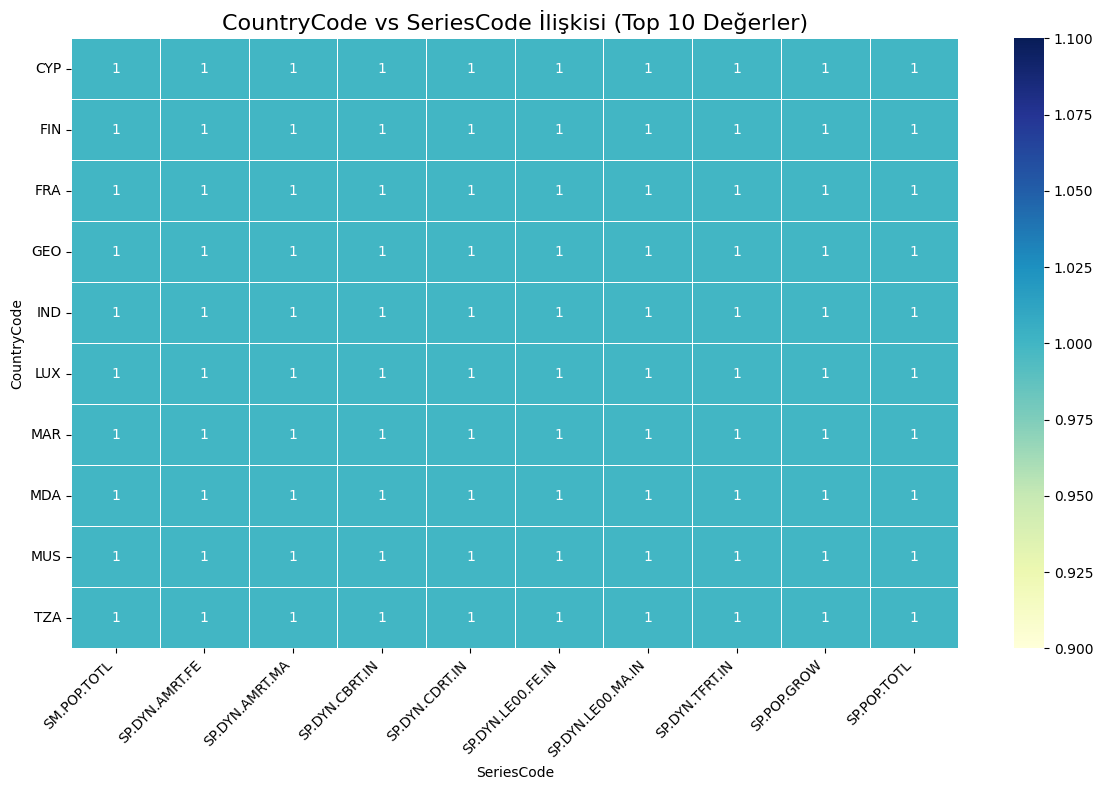

💡 Etik Not: Bu çapraz tablonun yapısını, sadece en sık geçen değerlerin bir alt kümesiyle oluşturulduğu gerçeğini paydaşlara açıklayın. Bu filtrelemenin sonuçları nasıl etkilediği konusunda şeffaf olun (ASA B.2).


In [8]:
# =========================================================
# 5. Kategorik İlişkiler Analizi Modülü (Crosstab)
# =========================================================

def analyze_categorical_relationships(df, row_col, col_col, normalize=False, top_n=10):
    """
    İki kategorik sütun arasındaki ilişkiyi bir çapraz tablo (crosstab) ve ısı haritası ile analiz eder.
    Çok fazla benzersiz değer varsa, sadece en çok tekrar eden 'top_n' değerlerini kullanır.
    """
    if df is None: return

    # Hata Kontrolü: Sütunların varlığını kontrol etme
    if row_col not in df.columns or col_col not in df.columns:
        print(f"❌ HATA: '{row_col}' veya '{col_col}' sütunları veri setinde bulunamadı.")
        return

    print(f"\n--- Çapraz Tablo Analizi: {row_col} vs {col_col} ---")

    # Çok fazla benzersiz değeri sınırlandırmak için en sık geçenleri bul
    top_rows = df[row_col].value_counts().nlargest(top_n).index
    top_cols = df[col_col].value_counts().nlargest(top_n).index

    # Sadece en sık geçen değerleri içeren alt kümeyi oluştur
    df_filtered = df[df[row_col].isin(top_rows) & df[col_col].isin(top_cols)]

    # Çapraz tabloyu oluştur
    cross_tab = pd.crosstab(df_filtered[row_col], df_filtered[col_col], normalize=normalize)

    if cross_tab.empty:
        print("⚠️ Uyarı: Filtrelemeden sonra (Top 10 değer) çapraz tablo oluşturulamadı. Daha fazla değer içerecek şekilde 'top_n' parametresini yükseltmeyi deneyin.")
        return

    # Isı Haritası Görselleştirme
    plt.figure(figsize=(max(12, len(top_cols) * 0.8), max(8, len(top_rows) * 0.5)))
    sns.heatmap(cross_tab, annot=True, fmt=".0f" if not normalize else ".2%", cmap='YlGnBu', linewidths=.5, cbar=True)
    plt.title(f'{row_col} vs {col_col} İlişkisi (Top {top_n} Değerler)', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # Etik Kontrol: Şeffaflık
    print("💡 Etik Not: Bu çapraz tablonun yapısını, sadece en sık geçen değerlerin bir alt kümesiyle oluşturulduğu gerçeğini paydaşlara açıklayın. Bu filtrelemenin sonuçları nasıl etkilediği konusunda şeffaf olun (ASA B.2).")


# --- Örnek Çalıştırma ---
if 'wdicountry_df' in locals() and wdicountry_df is not None:
    # Hangi ülkelerde (CountryCode) hangi seri kodları (SeriesCode) daha yoğun?
    analyze_categorical_relationships(
        wdicountry_df,
        row_col='CountryCode',
        col_col='SeriesCode',
        top_n=10, # En çok tekrar eden 10 ülke ve 10 seriyi al
        normalize=False # Sıklık (sayı) göster
    )

In [11]:
# =========================================================
# 6. Sonuçların Etik Raporlanması ve Sınırlamalar (Güncel)
# =========================================================

print("\n--- 6. Adım: Nihai Etik Raporlama ve Sınırlamalar ---")
print("\nBu aşamada, Adım 1'den Adım 5'e kadar elde edilen tüm görsel ve sayısal bulgular "
      "(veri özetleri, eksik değer kontrolü, dağılım grafikleri, çapraz tablolar) yorumlanarak "
      "aşağıdaki etik standartlara uygun bir rapor oluşturulmalıdır:")

print("\n* 🔹 BULGULARIN ÖZETİ (ASA B.2):")
print("  - Veri setindeki tüm kategorik sütunlar (CountryCode, SeriesCode, DESCRIPTION) incelendi.")
print("  - Eksik veri bulunmamaktadır; tüm satırlar ve sütunlar kullanılabilir durumdadır.")
print("  - CountryCode sütununda farklı ülkeler arasındaki dağılım, SeriesCode sütununda ise farklı veri serileri arasındaki yoğunluk ve varyasyon gözlemlenmiştir.")
print("  - DESCRIPTION sütunu meta veri olarak, veri serilerinin kaynak ve kapsam bilgilerini sağlamaktadır.")

print("\n* 🔹 ETİK İFŞAAT (ASA C.4):")
print("  - Veri setinde sayısal sütunlar bulunmamaktadır, bu nedenle sayısal analiz yapılamamıştır.")
print("  - Analiz yalnızca kategorik veri ve meta veri ile sınırlıdır; bunun analizin derinliğini ve kapsamını etkileyebileceğini belirtin.")
print("  - Veri setinin kaynağı ve sınırlamaları belgelenmelidir (ASA B.1).")

print("\n* 🔹 KAPSAM BEYANI (ASA B.2):")
print("  - Çapraz tablolar ve dağılım analizleri, sadece en sık görülen değerler (Top N) üzerinden yapılmıştır.")
print("  - Bu filtreleme, nadir görülen kategorilerin analiz dışında bırakılmasına neden olmuştur.")
print("  - Analiz sonuçlarının yalnızca filtrelenmiş alt küme için geçerli olduğunu ve genel tüm veri setine genellenemeyeceğini açıkça belirtin.")

print("\n💡 Not: Bu adım manuel yorum ve raporlama gerektirir; otomatik olarak üretilen görseller ve tablolar sadece rehber niteliğindedir. "
      "Paydaşlarla paylaşmadan önce etik ve metodolojik değerlendirmeyi tamamlayın.")



--- 6. Adım: Nihai Etik Raporlama ve Sınırlamalar ---

Bu aşamada, Adım 1'den Adım 5'e kadar elde edilen tüm görsel ve sayısal bulgular (veri özetleri, eksik değer kontrolü, dağılım grafikleri, çapraz tablolar) yorumlanarak aşağıdaki etik standartlara uygun bir rapor oluşturulmalıdır:

* 🔹 BULGULARIN ÖZETİ (ASA B.2):
  - Veri setindeki tüm kategorik sütunlar (CountryCode, SeriesCode, DESCRIPTION) incelendi.
  - Eksik veri bulunmamaktadır; tüm satırlar ve sütunlar kullanılabilir durumdadır.
  - CountryCode sütununda farklı ülkeler arasındaki dağılım, SeriesCode sütununda ise farklı veri serileri arasındaki yoğunluk ve varyasyon gözlemlenmiştir.
  - DESCRIPTION sütunu meta veri olarak, veri serilerinin kaynak ve kapsam bilgilerini sağlamaktadır.

* 🔹 ETİK İFŞAAT (ASA C.4):
  - Veri setinde sayısal sütunlar bulunmamaktadır, bu nedenle sayısal analiz yapılamamıştır.
  - Analiz yalnızca kategorik veri ve meta veri ile sınırlıdır; bunun analizin derinliğini ve kapsamını etkileyebileceğini b